# Dimensionality Reduction and Clustering

For this homework we will be using some image data! Specifically, the MNIST data set. You can load this data easily with the following commands:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data




## Data   
   
Before we begin our analysis, let's take a look at our data to see what we are up against. We know that this dataset is a collections of hand-drawn digits, but we can examine a few to get a feel.

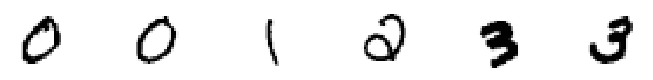

In [3]:
fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 4700
    plt.imshow(X[ii*4700].reshape((28,28)), cmap='Greys')

## Principle Component Analysis   
   
Use PCA to reduce the dimensionality

a. How many components did you use? Why?

b. Plot the first two components. Do you notice any trends? What is this plot showing us?

c. Why would you use PCA? What is it doing? And what are the drawbacks?

d. Plot some of the images, then compress them using PCA and plot again. How does it look?
   
### a) Components

With the data read in, we are going to look into dimension reduction using Principle Component Analysis (PCA).
PCA is a valuable technique that allows data in higher dimension to be projected down to fewer dimensions while 
preserving the maximum amount of variance, or information, as possible. So, we first need to determine how many 
components we will be using.   
   
Starting out, we will look at how much variance is maintained when only a few components are used.

In [4]:
#Initial size of our images
X.shape

(70000, 784)

In [5]:
from sklearn.decomposition import PCA

#PCA using 2 components
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)
print("Shape {}:".format(X_2dim.shape))
print("Variance Explained by Component: {}".format(pca.explained_variance_ratio_))
print("Total Variance Explained: {}".format(np.sum(pca.explained_variance_ratio_)))

Shape (70000, 2):
Variance Explained by Component: [0.09746116 0.07155445]
Total Variance Explained: 0.1690156049970311


In [6]:
#PCA using 3 components
pca = PCA(n_components=3)
X_3dim = pca.fit_transform(X)
print("Shape: {}".format(X_3dim.shape))
print("Variance Explained by Component: {}".format(pca.explained_variance_ratio_))
print("Total Variance Explained: {}".format(np.sum(pca.explained_variance_ratio_)))

Shape: (70000, 3)
Variance Explained by Component: [0.09746116 0.07155445 0.06149531]
Total Variance Explained: 0.2305109146988844


Great! Using PCA succesfully reduced our dimensionality from 784 down to 2 and 3. That is quite a feat, but we are losing over three quarters of our information with this reduction. There is a significant jump, however, from using two components and three. This suggests that if we keep moving forward, we should find a number of components we can be satisfied with. There is a problem though, when do we stop?   
   
What we will do now is plot our explained variance as we add more components.

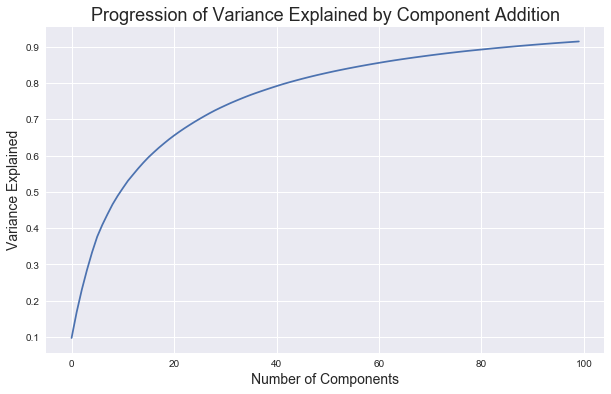

In [7]:
#100 components is the max for this plot and was selected somewhat arbitrarily
pca = PCA(n_components=100)
running_pca = pca.fit_transform(X)

#We are going to calculate the variance explained at each step to monitor our progression
cumulative = np.cumsum(pca.explained_variance_ratio_)
f, ax = plt.subplots(figsize = (10,6))
plt.plot(range(len(cumulative)),cumulative)
plt.ylabel("Variance Explained",fontsize = 14)
plt.xlabel("Number of Components",fontsize = 14)
plt.title("Progression of Variance Explained by Component Addition",fontsize = 18)

That is a pretty graph, but now we need to find out how to best use it. It looks like the best we can get is about 90% and then the variance tapers off. But, we can also observe that after about 70% of the variance is explained, the marginal increase starts to decrease relatively quick. So, to satisfy keeping the majority of variance while also reducing our dimensionality a decent amount, we will set our number of components to be the amount that allow us to keep 70% of the variance.   
   
To do this we will feed the n_components parameter of 70% to PCA.

In [8]:
#PCA with 70% variance explained
pca = PCA(n_components=.7)
dim_reduct = pca.fit_transform(X)
print("Shape: {}".format(dim_reduct.shape))

Shape: (70000, 26)


26 is our magic number.

### b) Plot two components   
   
To see how our first two components appear visually, we will revert back to our PCA model with just two components.

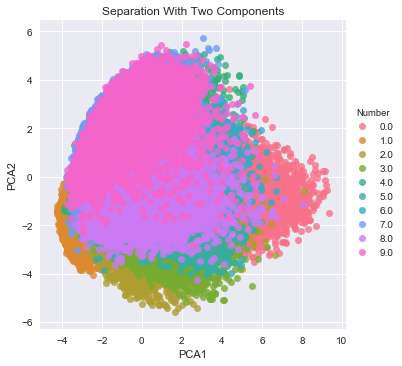

In [9]:
#PCA with two components
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

#Convert data to pandas DataFrame for easier plotting
data = pd.DataFrame(X_2dim,columns=['PCA1','PCA2'])
#Add labels
data['Number'] = y
sns.lmplot(x='PCA1', y='PCA2', data=data,hue='Number',fit_reg=False)
plt.title("Separation With Two Components")

As we saw earlier, using the first two components only allows us to explain about 16% of the differences between the numbers. However, this visualization helps us see that there is some good separation occuring even with only two components.   
   
From the graph it looks our model is starting to learn that curved numbers such as 8, 3 and 2 are different than those with straight lines, like 1, 7 and 9. There is a lot of work to go, but it is nice to be able to look into the model and visualize what is going on.

### c) PCA: Pros and Cons   
   
So far we have started to see how PCA can be used to help solve the problem of dimensionality. Now, let's talk about what we like about it and what can be worrisome.   
   
#### Pros   
   
The great thing about PCA is that is can be used on virtually any dataset. I mean, we just used vectors to interpret what is going on with tiny little pixels that make up an image of a hand-drawn number! It does not get any better than that. PCA also takes the best possible vector into consideration at each component step. This ensures that we will always get the best reduction when we specify the number of components. Also, if anything were ever to seem wrong or out of the ordinary, PCA is completely reversible and you can always undo what was created.  
   
#### Cons   
   
PCA is not perfect and it is vulnerable to flaws just like the rest of us. First and foremost, PCA uses Euclidean distance to calculate the orthogonal vector that gives the reduction with the most variance. This can cause problems in datasets where there are many categorical variables. Problems may also appear in that when the dimensionality is significantly reduced, we may not be able to interpret the results as easily.

### d) Plot Original Images vs. Compressed   
   
We have seen what our components are doing to help us classify each number, but now let's see how our model is interpreting each image based on the amount of components we choose.   
   
First, let's look at the first images we looked at when we started.

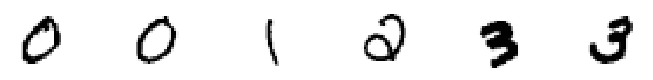

In [10]:
fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 4700
    plt.imshow(X[ii*4700].reshape((28,28)), cmap='Greys')

Now we will see what the images look like with our chosen level of 26 components.

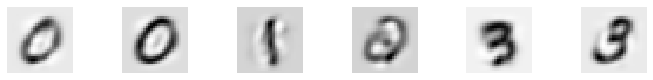

In [11]:
#PCA with 26 components
pca = PCA(n_components=26)
X_26dim = pca.fit_transform(X)

#Transfrom back to its original space
reverse = pca.inverse_transform(X_26dim)

fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 4700
    plt.imshow(reverse[ii*4700].reshape((28,28)), cmap='Greys')

Clearly, that is not as pretty to look at. But it is very interesting that with only 26 of the 700+ dimensions you can start to clearly see the defining characteristics of each number. Albeit a little blurry.

## TSNE

In [12]:
from sklearn.manifold import TSNE

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

a. How does this plot differ from your PCA plot?

b. How robust is it to changes in perplexity?

c. How robust is it to different learning rate and number of iterations?


### a) Plotting with TSNE   
   
TSNE is a great tool for visualizing high dimensional data in a two-dimensional space. At first, this can seem like something that would not be very helpful because what does a multi-dimensional thing even mean in two-dimensions. Truth be told it can actually be very difficult to interpret what it means. TSNE does not maintain spacial differences or aspect ratios. Instead, TSNE will group datapoints that are similar in high dimensions and represent them as clusters in two-dimensional space. Rest assured, we will see how it can be useful.   
   
We will start by using a TSNE model with moderate parameters to get an idea of what it gives us. It is important to note that when using TSNE it can be beneficial to use PCA or another dimension reduction technique so that TSNE does not have to work more than necessary.

In [97]:
#PCA with 26 components so that TSNE does not have to do too much work
pca = PCA(n_components=26)
X_26dim = pca.fit_transform(X)

#Randomize entries in the original data
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#Fit our data to the TSNE model
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...
[t-SNE] Computed neighbors for 10000 samples in 4.822s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.394909
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.338417
[t-SNE] Error after 1000 iterations: 1.744409


You may notice that I opted to use verbose = 1. This helps to see what is happening within the TSNE model and it can be helpful to identify if something is going wrong.   
   
Now, let's look at what TSNE is showing us. Here is the 2D plot.

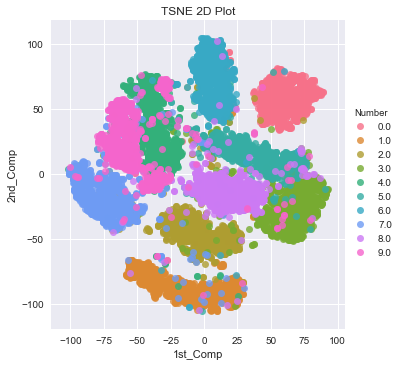

In [98]:
#For ease of plotting, we create a Pandas DataFrame
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE 2D Plot")

Let's talk about how this is different from our plot of the first two PCA components. The major difference is obvious. Instead of a massive cluster in the middle with some distinction, this TSNE plot shows a unique cluster for almost every number. If we had to pick between which of the two techniques best represented our numbers, clearly TSNE would be the victor.   
   
### b) Perplexity   
   
Our first TSNE plot did a good job of generating unique clusters (or so we think). We should not just accept these clusters as the ultimate truth, so let's see if changing our perplexity parameter will still give us the same 'relative' clusters. I say 'relative' because TSNE may display different distances between clusters each time, but that does not mean the clusters are different. It is important to remember that spatial distance is not maintained by TSNE.   
   
To understand how robust our model is, we will look at at TSNE models with different perplexity levels. One will be lower and one higher.

In [99]:
#Lower Perplexity
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

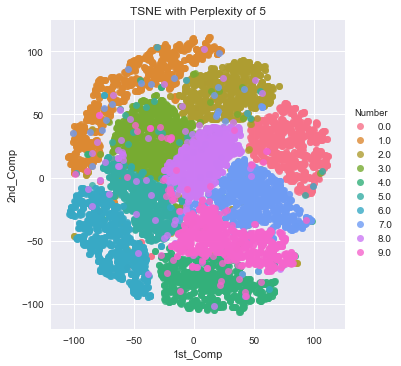

In [100]:
#Perplexity 5 plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 5")

Our lower perplexity TSNE model looks pretty good! It looks like this model maintained the same general clusters, but I would have to say that this one looks like it is doing a better job of separating the masses.

In [101]:
#Higher Perplexity
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

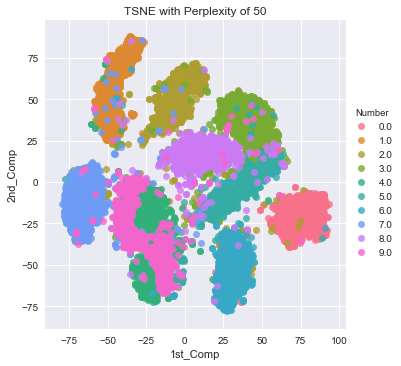

In [102]:
#Perplexity 50 plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 50")

This higher perplexity TSNE model generated some more distinct clusters, but it also seems to be having a hard time some numbers. We can see this by looking at the group of randomly assigned datapoints in the middle. From this analysis of perplexity it seems like in general all perplexities will be similar, but at least for this example the lower perplexity did a good job.

### c) Learning Rates and Iterations   
   
Perplexity is not the only paramenter TSNE takes in. Naturally, we also want to look at how other parameters, such as learning rates and number of iterations affect our TSNE display. For this example we will keep perplexity at 5 and show a lower number of iterations for one model and a lower learning rate for the other.

In [103]:
#Lower number of iterations
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=500, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

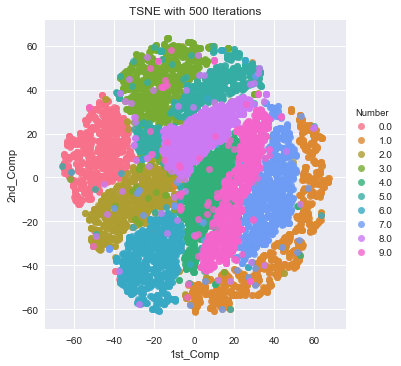

In [104]:
#Lower n_iter plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with 500 Iterations")

In [105]:
#Lower learning rate
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=200)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

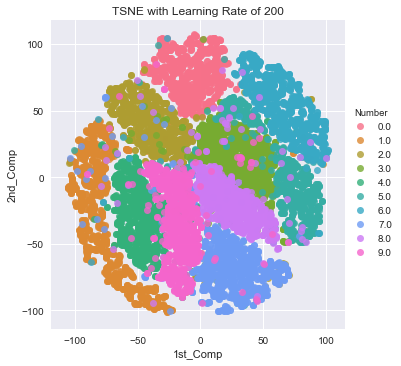

In [106]:
#Lower learning_rate plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Learning Rate of 200")

Our TSNE models seem to be fairly robust to different iterations and learning rates. This is nice considering we want to trust what it is showing us.

## K-Means Clustering

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

Perform k-means clustering:

a. How did you choose k?

b. How did you evaluate your clustering?

c. Visualize your clusters using t-sne

d. Did you scale your data?

e. How robust is your clustering?

### a) Choosing K   
   
Since our goal is to classify which number is depicted in the image, we will choose a K of 10. This will allow the K-means clustering to distinguish a group, hopefully, for each number from 0 to 10.

In [25]:
#Define our kmeans model
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
k_clusters = kmeans.predict(X)

### b) Evaluation   
   
We willl use a few measures of evaluation to see how close we actually are getting to the truth with the clusters that K-Means is coming up with. The following metrics are all provided by Scikit-Learn.
 - Adjusted Rand Score: Computes a similarity measure between two clusterings by considering all paris of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. Score is between -1 and 1 with 1 being a perfect score.   
    
    
 - Completeness Score: A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. Score is between 0 and 1.

In [29]:
print("Adjusted Rand Score: {}".format(adjusted_rand_score(y, k_clusters)))

Adjusted Rand Score: 0.36551155550116105


In [31]:
print("Completeness Score: {}".format(completeness_score(y, k_clusters)))

Completeness Score: 0.5033979274825329


### c) Plotting K-Means with TSNE

To plot our data with TSNE we will use our previous TSNE model that we configured, but we are going to add the number labels that K-Means gave us as opposed to the ones provided by SciKit-Learn.

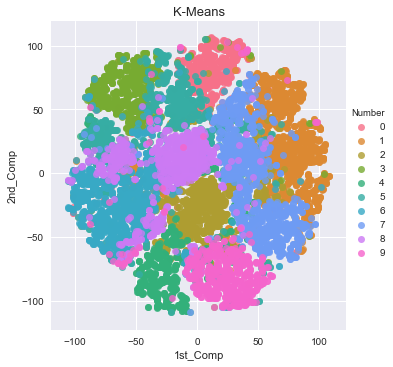

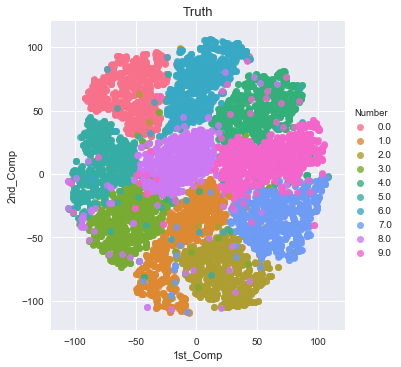

In [57]:
# K-Means Clustering
df_kmeans = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
#Apply K-Means numbers
df_kmeans['Number'] = k_clusters[rows[:n_select]]

#Plot K-Means
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("K-Means",fontsize=13)
#Plot True labels
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("Truth",fontsize=13)

Our K-means estimates seem to have a hard time distinguishing between similar numbers like 7 and 1.

### d) Scale Data   
   
Before we take our K-Means model as a given, we will examine how it differs when we scale our data by normalizing it.

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [61]:
scaler.fit(X)
scaled = scaler.transform(X)

In [62]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Completeness Score: 0.4432334644107336


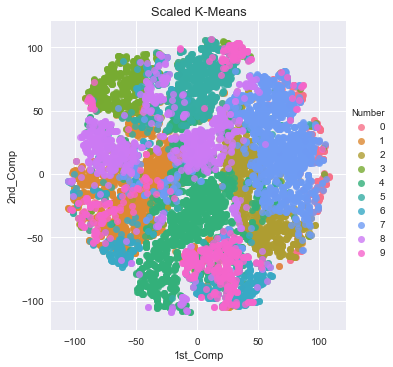

In [66]:
sk_clusters = kmeans.predict(scaled)
# K-Means Clustering
df_kmeans = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
#Apply K-Means numbers
df_kmeans['Number'] = sk_clusters[rows[:n_select]]

print("Completeness Score: {}".format(completeness_score(y,sk_clusters)))

#Plot K-Means
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("Scaled K-Means",fontsize=13)

It looks like scaling the data did not do the best for us. If we take a look at the clusters, it looks like it is having a harder time distinguishing the distance between the different numbers. As such, going forward we will not use the scaled data.   
   
### e) Robustness Checks   
   
Our final assessment of the K-Means model will be to see how robust it is to changes in random samples that are used.

In [85]:
def robust_check(size):
    for num in range(4):
        np.random.seed(seed=num)
        rows = np.arange(70000)
        np.random.shuffle(rows)
        n_select=size
        tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=500)
        results = tsne.fit_transform(X_26dim[rows[:n_select],:])
        kmeanss = kmeans.fit(X[rows[:n_select],:])
        k_clusters = kmeanss.predict(X)
        df = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
        df['Number'] = k_clusters[rows[:n_select]]
        sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df,hue='Number',fit_reg=False)
        plt.title("Random Sample of size {}".format(size))

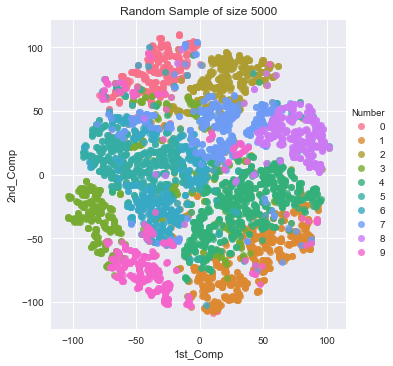

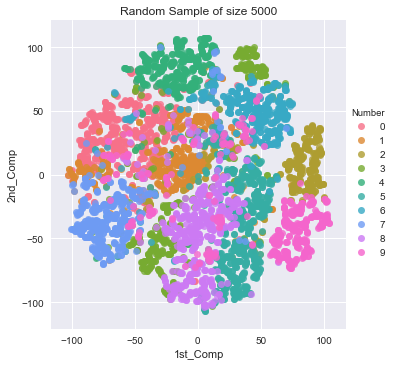

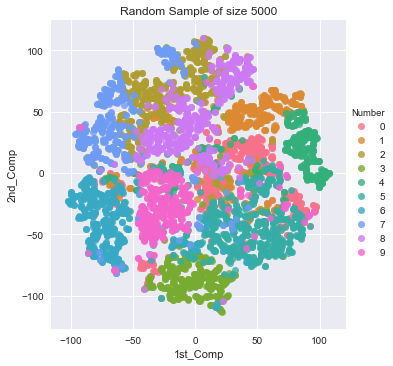

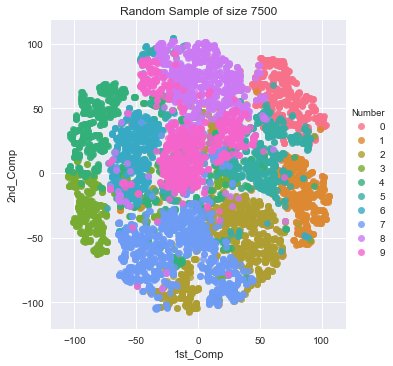

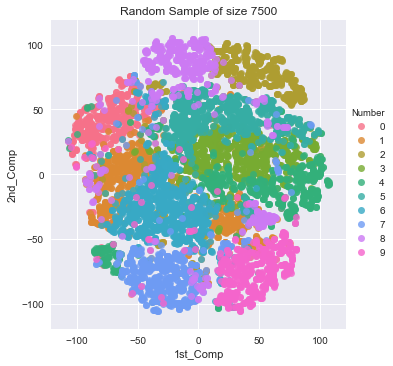

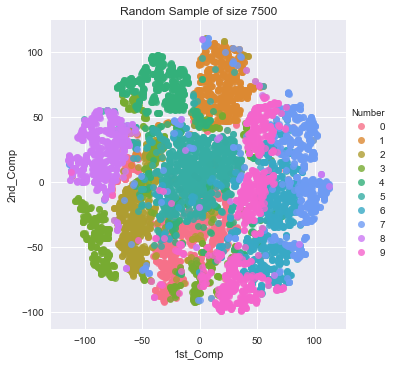

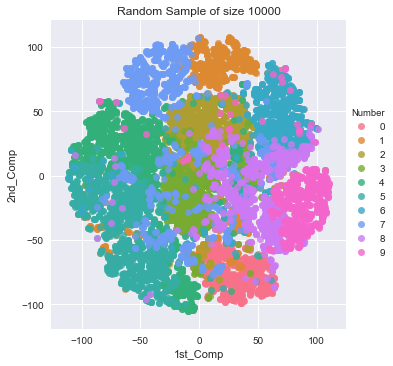

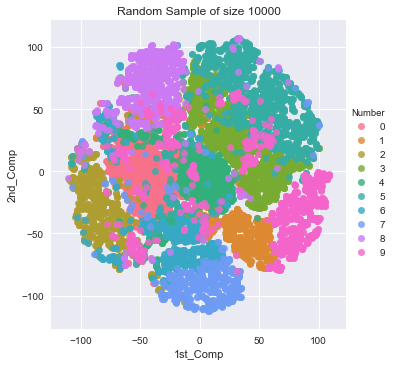

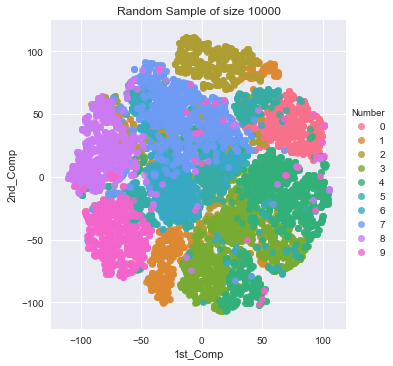

In [86]:
#Loop over random sample sizes
for size in [5000,7500,10000]:
    robust_check(size)

The previous graphs show us that if we change our sample from our data or our sample size, then our clusters will change. This is not a good sign for our model as it appears not to be robust to these changes.

## Hierarchical Clustering

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage

Perform hierarchical clustering:

a. Plot your dendrogram

b. How many clusters seem reasonable based off your graph?

c. How does your dendrogram change with different linkage methods?

### a) Plotting a Dendrogram

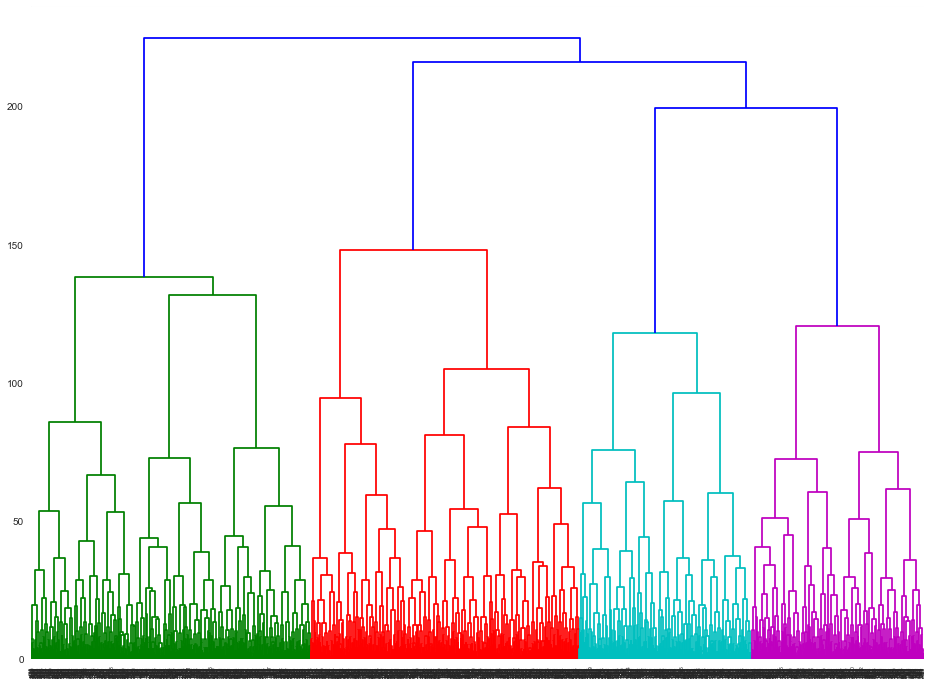

In [93]:
dfsub = df.sample(n = 2500)
complete_link = linkage(dfsub, 'complete')
plt.figure(figsize=(16, 12))
dn_c = dendrogram(complete_link)

### b) Number of Clusters   
   
These Dendrograms can be hard to use effectively when they display so many different connections, but this specific one seems to suggest that there should only be four clusters even though we have ten different numbers.

### c) Different Linkage Methods   
   
Let's see if we can get more obvious cluster separations with different linkages. We will look at:
 - Average: Use the average distance between points in clusters
 - Ward: Merge the two clusters which minimize the total within-cluster variance after merging

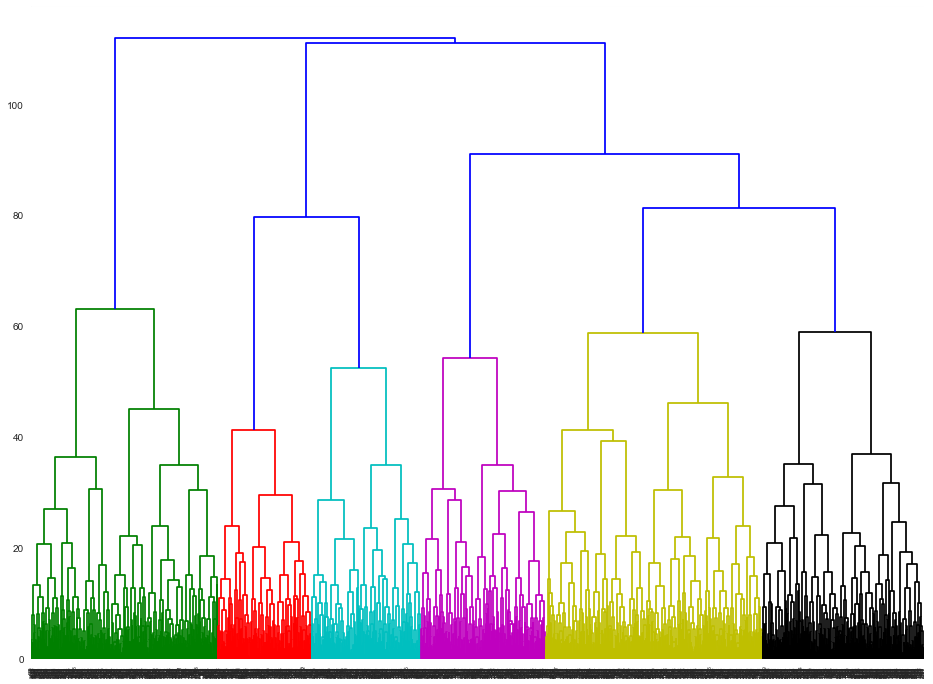

In [95]:
avg_link = linkage(dfsub, 'average')
plt.figure(figsize=(16, 12))
dn_a = dendrogram(avg_link)

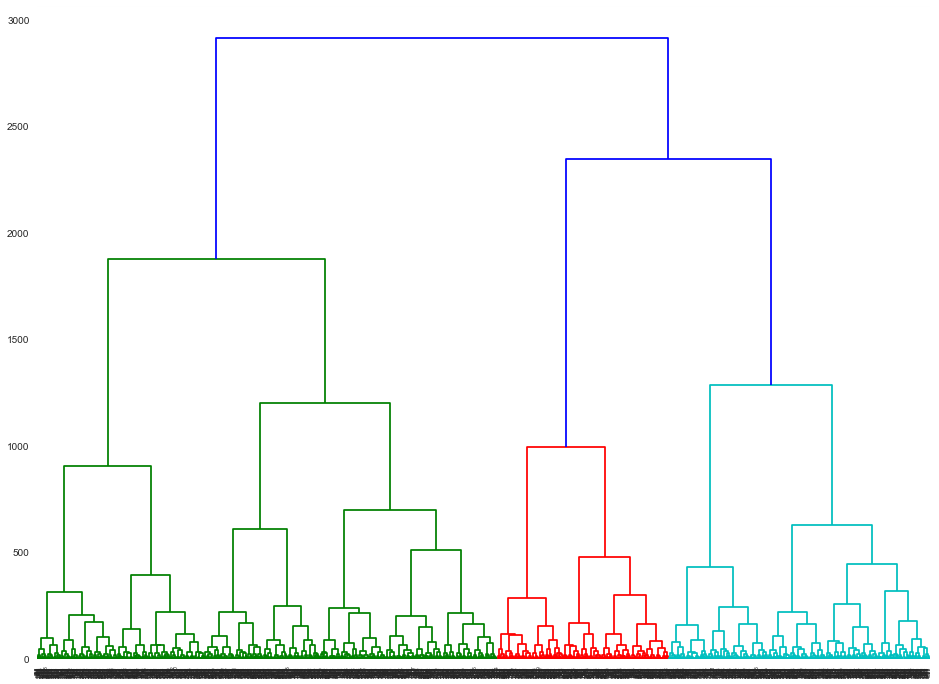

In [96]:
avg_link = linkage(dfsub, 'ward')
plt.figure(figsize=(16, 12))
dn_a = dendrogram(avg_link)

The Ward Linkage method seems to be the most efficient as you can see by the very early connections that happen in each cluster group.

# Finale

This assignment has been a great way to show that machine learning can do much more than simple regression or classification problems. We have shown how methods such as PCA, TSNE, K-Means Clustering and Hierarchical Clustering can be extremely useful when looking at images such as the MNIST dataset. From here we should be use this knowledge for even more complex datasets.